The purpose of this notebook is to generate the baseline for `test_sinogram` in the tests module. This test generates a 32x32p sinogram of a single right triangle and a circle with a hole in the center.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from xdesign import *
from numpy.testing import assert_allclose

In [2]:
circtri = XDesignDefault()

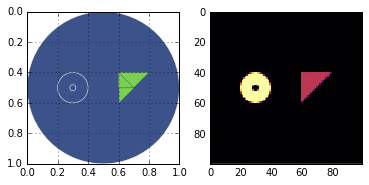

In [3]:
sidebyside(circtri)
plt.show()

## Reference Generator

Generate two of the exact same sinogram. Save one for `nosetests`. Next, compare the two sinograms using `assert_allclose` to determine the smallest `absolute tolerance` that may be achieved.

In [17]:
sino, prb = sinogram(32, 32, circtri)
np.save('test_sinogram.npy', sino, allow_pickle=True)

In [18]:
sino, prb = sinogram(32, 32, circtri)
sino_reference = np.load('test_sinogram.npy')

In [19]:
# sino = -np.log(sino)/prb.size
# sino_reference = -np.log(sino_reference)/prb.size

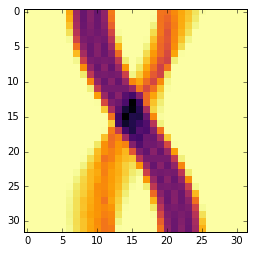

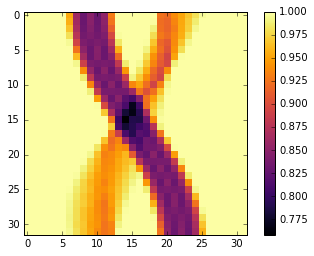

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0.01

(mismatch 0.390625%)
 x: array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],...
 y: array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],...

In [20]:
plt.figure()
plt.imshow(sino, cmap='inferno', interpolation='nearest')
plt.figure()
plt.imshow(sino_reference, cmap='inferno', interpolation='nearest')
plt.colorbar()
plt.show()

assert_allclose(sino, sino_reference, atol=1e-2)

## Variablilty Study

The `absolute tolerance` above has to be set pretty high (`1e-2`) for the sinograms to be considered "repeatable". Here we look at a larger sample size (`reps`) of repeated sinograms for multiple sizes. The plots show the 1 standard deviation of the sinogram data.

The results show that while circle instersections are very repeatable, the polygon intersections are not. This is probably because the polygon intersections do not use analytical equations; they are calculated using numerical methods. The good news is that the variance decreases as the sinogram size increases.

In [21]:
size = [32, 64, 128, 256]
reps = 20

Size: 32


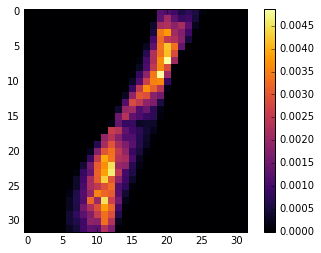

In [ ]:
sino_list = []
for s in size:

    this_sino = np.empty((s,s,reps))
    for r in range(reps):
        this_sino[:,:,r], _ = sinogram(s, s, circtri)

    sinoA = np.mean(this_sino, axis=2)
    sinoS = np.std(this_sino, axis=2)
    sino_list.append(sinoS)
    
    print("Size: %i" % s)
    plt.imshow(sinoS, cmap='inferno', interpolation='nearest')
    plt.colorbar()
    plt.show()